In [1]:
import nibabel as nib
import numpy as np
import matplotlib.colors as mcolors
from ext.mindboggle.labels import extract_numbers_names_colors
import matplotlib.pyplot as plt
import pandas as pd
import label_mapping

n_classes = 50
label_map = label_mapping.get_label_mapping(n_classes)

Using label mapping file: /om2/user/hgazula/nobrainer_training_scripts/csv-files/50-class-mapping.csv
Conversion into 50 segmentation classes from freesurfer labels


In [2]:
fs_number, fs_names, fs_colors = extract_numbers_names_colors(
    "/om2/user/hgazula/freesurfer/FreeSurferColorLUT.txt"
)

df = pd.read_csv("/om2/user/hgazula/nobrainer_training_scripts/csv-files/50-class-mapping.csv", 
                 header='infer',
                 index_col=0)

df["colors"] = df["original"].apply(lambda x: fs_colors[fs_number.index(x)])
df = df.drop_duplicates(subset='new')

my_colors = df.colors.tolist()
my_colors[0] = [255, 255, 255]  # replacing background with white color
cmap = mcolors.ListedColormap(np.array(my_colors) / 255)


In [3]:

aseg = "/nese/mit/group/sig/data/kwyk/rawdata/pac_0_aseg.nii.gz"

aseg = nib.load(aseg).get_fdata().astype(np.uint)
print(aseg.shape)

for key, value in label_map.items(): # Taking key and values from dictionary.
    aseg[aseg==key] = value

(256, 256, 256)


In [4]:
    
# plt.imshow(aseg[:, 130, :], cmap=cmap) #, interpolation="nearest")
# plt.show()

In [5]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# # # Assuming you have a segmentation map with labels
# # # Replace this with your actual segmentation map
# # # segmentation_map = np.random.randint(low=0, high=10, size=(256, 256))
# # aseg = "/nese/mit/group/sig/data/kwyk/rawdata/pac_0_aseg.nii.gz"
# # segmentation_map = nib.load(aseg).get_fdata().astype(np.uint)

# # Define the number of unique labels in your segmentation map
# num_labels = len(np.unique(aseg))

# # Create a custom colormap with distinct colors for each label
# colors = plt.cm.tab10(np.linspace(0, 1, num_labels))  # Use tab10 colormap for example
# custom_cmap = ListedColormap(colors)

# # Display the segmentation map using the custom colormap
# plt.imshow(aseg[:, 75, :], cmap=custom_cmap)
# plt.colorbar()
# plt.show()


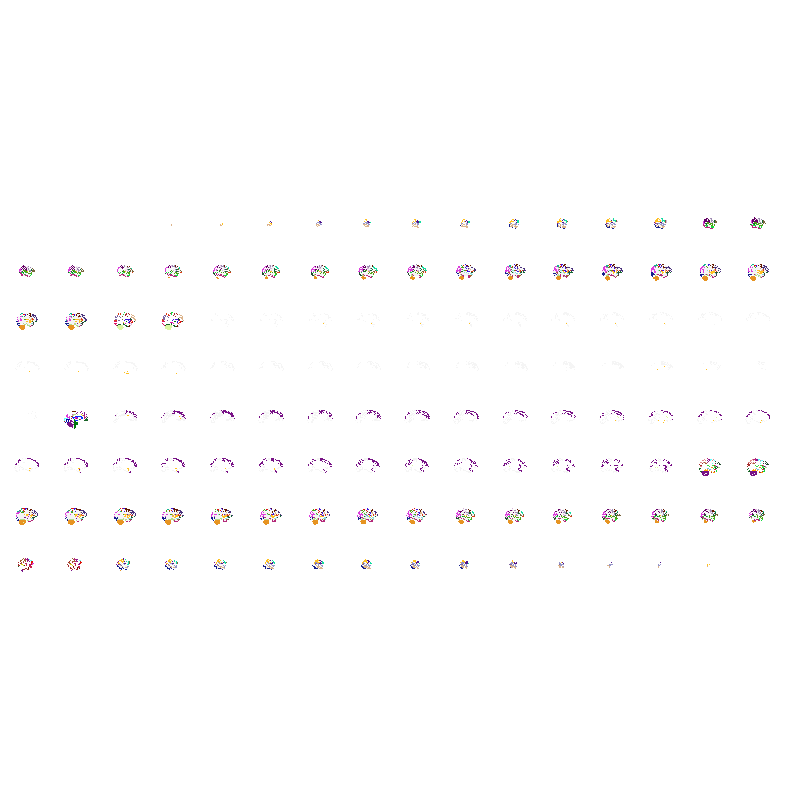

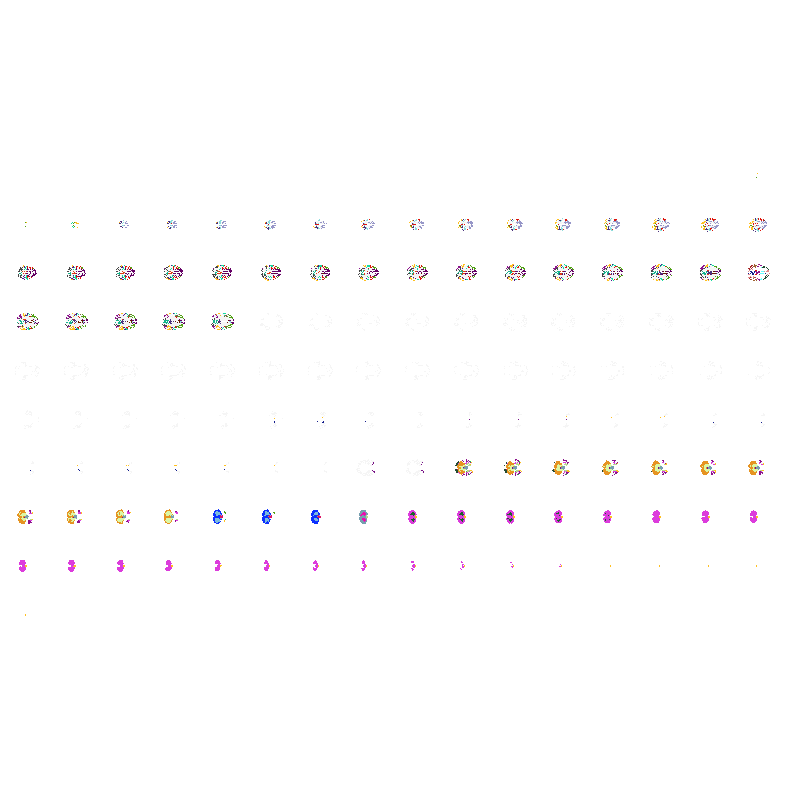

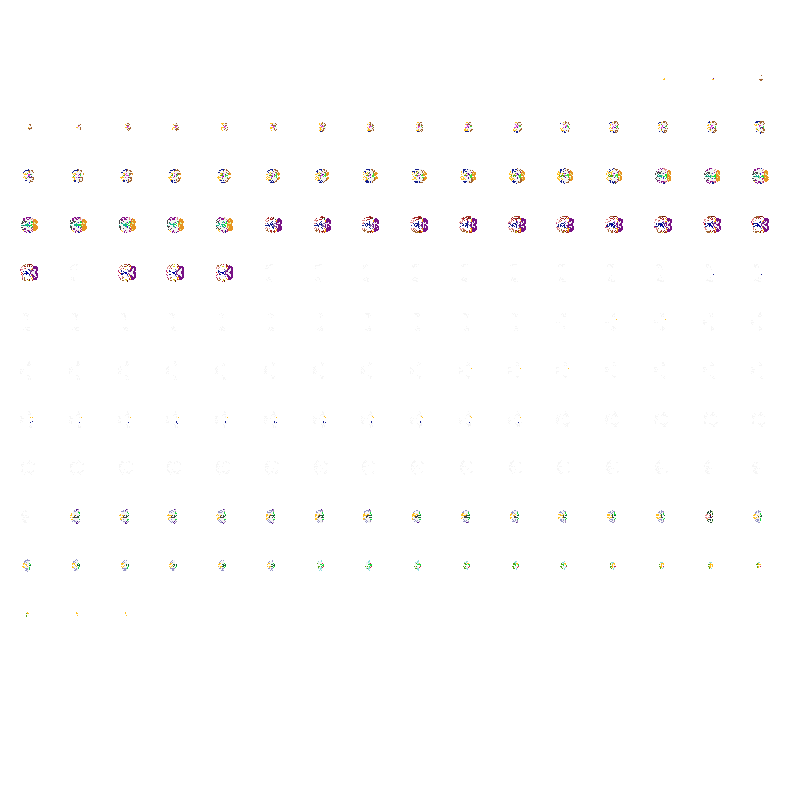

In [6]:
### grid plot of brain slices
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Generate example brain slices
# num_slices = 9
# brain_slices = [np.random.rand(256, 256) for _ in range(num_slices)]

# aseg = "/nese/mit/group/sig/data/kwyk/rawdata/pac_0_aseg.nii.gz"

# aseg = nib.load(aseg).get_fdata().astype(np.uint)
# print(aseg.shape)

# for key, value in label_map.items(): # Taking key and values from dictionary.
#     aseg[aseg==key] = value

# Create a grid of subplots
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(16, 16),  # creates a 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inches
                 )

# Plot each brain slice
for ax, brain_slice in zip(grid, aseg):
    ax.imshow(brain_slice, cmap=cmap, interpolation='nearest')
    ax.axis('off')

# Set title
# plt.suptitle('Brain Slices')

# Save as PNG
plt.savefig('sagittal.png', dpi=600)  # Use higher dpi for better resolution

# Save as PDF
# plt.savefig('page1.pdf', dpi=600)

# # Show the plot
# plt.show()

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(16, 16),  # creates a 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inches
                 )

# Plot each brain slice
for ax, brain_slice in zip(grid, np.moveaxis(aseg, 1, 0)):
    ax.imshow(brain_slice, cmap=cmap, interpolation='nearest')
    ax.axis('off')

# Set title
# plt.suptitle('Brain Slices')

# Save as PNG
plt.savefig('axial.png', dpi=600)  # Use higher dpi for better resolution

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(16, 16),  # creates a 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inches
                 )

# Plot each brain slice
for ax, brain_slice in zip(grid, np.moveaxis(aseg, 2, 0)):
    ax.imshow(brain_slice, cmap=cmap, interpolation='nearest')
    ax.axis('off')

# Set title
# plt.suptitle('Brain Slices')

# Save as PNG
plt.savefig('coronal.png', dpi=600)  # Use higher dpi for better resolution
